In [1]:
# Getting Python ready
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
#%matplotlib widget

In [24]:
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):

    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))
    #print(observation)

    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))

    index_ge1 = np.less_equal(observation, bernoulliParam_p)

    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]


    # while (repeatIndex < numRepeatsOfExp):
    #     observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
    #     #index_ge1 = np.greater_equal(observation[repeatIndex,:], bernoulliParam_p)
    #     index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)

    #     #print(observation[repeatIndex,:])
    #     #print(index_ge1)

    #     observation[repeatIndex,index_ge1] = profitLoss[0]
    #     observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]

    #     #print(observation[repeatIndex,:])

    #     #print(np.sum(observation[repeatIndex,:])/numTrialsInAnExp)
    #     repeatIndex = repeatIndex + 1
    print("observed values " , observation)
    return observation

In [25]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 1
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])


observed values  [[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


The histogram values are: [17  3]
The histogram values are: [0.  0.5 1. ]


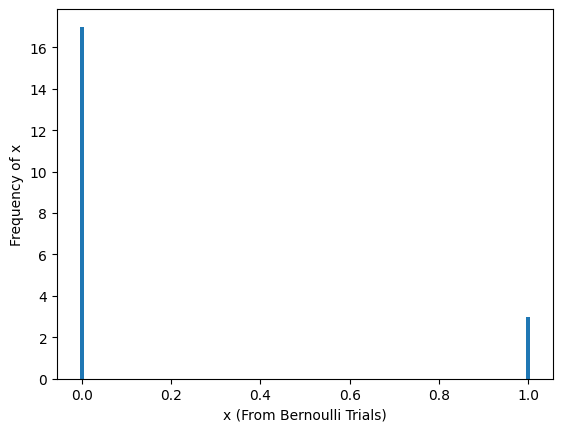

In [28]:
#Prints and plots
# print(("The array of observations (1 row per experiment repeat):", observation))
# print(("Frequency of ones  (1 row per experiment repeat):",np.sum(observation,axis=1)))

fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True)

histVal = np.histogram(observation, bins=[0,0.5,1],density=False)
#histVal = ax1.hist(observation[0][:], bins=range(0,2), density=False, align='left')

print("The histogram values are:", histVal[0])
print("The histogram values are:", histVal[1])
#print("The histogram values are:", histVal[1][0,2])

ax1.bar([0, 1], histVal[0]/v_numRepeatsOfExp, width = 0.01)

ax1.set_xlabel("x (From Bernoulli Trials)")
ax1.set_ylabel("Frequency of x")
fig1.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))

In [29]:
frequentists = []

v_bernoulliParam_p = 0.2


observationFreqentist1 = aBernoulliExperiment(np.random.default_rng(123768), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 20, numRepeatsOfExp=5, profitLoss=[1,0])


observed values  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
freq_arr = np.sum(observationFreqentist1,axis=1)
print("Number of ones per experiment of 20 trials is:\n" ,freq_arr,"\n")

freq_01_arr = [x/20for x in freq_arr]
print("Frequency of Success - 1s per experiment:\n" ,freq_01_arr,"\n")

freq_00_arr = [1-(x/20) for x in freq_arr]
print("Frequency of Failure - 0s per experiment:\n" ,freq_00_arr,"\n")

Number of ones per experiment of 20 trials is:
 [3. 2. 4. 4. 2.] 

Frequency of Success - 1s per experiment:
 [0.15, 0.1, 0.2, 0.2, 0.1] 

Frequency of Failure - 0s per experiment:
 [0.85, 0.9, 0.8, 0.8, 0.9] 



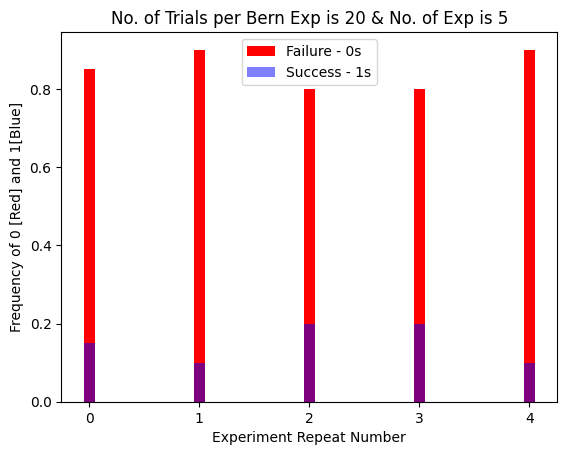

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_bar_graphs(frequencies_0, frequencies_1,numRepeatsOfExp=5,numTrialsInAnExp=20):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 0s bar graph
    ax.bar(x, frequencies_0, color='red', width = 0.1, label='Failure - 0s')

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.1, label='Success - 1s', alpha=0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of 0 [Red] and 1[Blue]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))
    ax.legend()

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_00_arr,freq_01_arr,5,20)

In [36]:
observationFreqentist2 = aBernoulliExperiment(np.random.default_rng(123768), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 20, numRepeatsOfExp=100, profitLoss=[1,0])

observed values  [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [38]:
freq_arr = np.sum(observationFreqentist2,axis=1)
print("Number of ones per experiment of 20 trials is:\n" ,freq_arr,"\n")

freq_01_arr = [x/20for x in freq_arr]
print("Frequency of Success - 1s per experiment:\n" ,freq_01_arr,"\n")

freq_00_arr = [1-(x/20) for x in freq_arr]
print("Frequency of Failure - 0s per experiment:\n" ,freq_00_arr,"\n")

Number of ones per experiment of 20 trials is:
 [3. 2. 4. 4. 2. 5. 5. 7. 2. 3. 4. 6. 6. 2. 6. 5. 4. 3. 4. 4. 0. 5. 6. 2.
 4. 0. 5. 1. 5. 4. 4. 7. 7. 2. 3. 4. 2. 3. 6. 4. 3. 2. 4. 3. 3. 4. 3. 4.
 3. 4. 4. 2. 3. 2. 3. 6. 2. 5. 5. 4. 3. 3. 5. 4. 6. 2. 3. 5. 5. 7. 3. 3.
 2. 6. 2. 1. 3. 4. 2. 3. 1. 5. 0. 5. 3. 3. 3. 5. 4. 3. 7. 4. 8. 3. 1. 7.
 4. 3. 2. 4.] 

Frequency of Success - 1s per experiment:
 [0.15, 0.1, 0.2, 0.2, 0.1, 0.25, 0.25, 0.35, 0.1, 0.15, 0.2, 0.3, 0.3, 0.1, 0.3, 0.25, 0.2, 0.15, 0.2, 0.2, 0.0, 0.25, 0.3, 0.1, 0.2, 0.0, 0.25, 0.05, 0.25, 0.2, 0.2, 0.35, 0.35, 0.1, 0.15, 0.2, 0.1, 0.15, 0.3, 0.2, 0.15, 0.1, 0.2, 0.15, 0.15, 0.2, 0.15, 0.2, 0.15, 0.2, 0.2, 0.1, 0.15, 0.1, 0.15, 0.3, 0.1, 0.25, 0.25, 0.2, 0.15, 0.15, 0.25, 0.2, 0.3, 0.1, 0.15, 0.25, 0.25, 0.35, 0.15, 0.15, 0.1, 0.3, 0.1, 0.05, 0.15, 0.2, 0.1, 0.15, 0.05, 0.25, 0.0, 0.25, 0.15, 0.15, 0.15, 0.25, 0.2, 0.15, 0.35, 0.2, 0.4, 0.15, 0.05, 0.35, 0.2, 0.15, 0.1, 0.2] 

Frequency of Failure - 0s per experiment:
 [0.85,

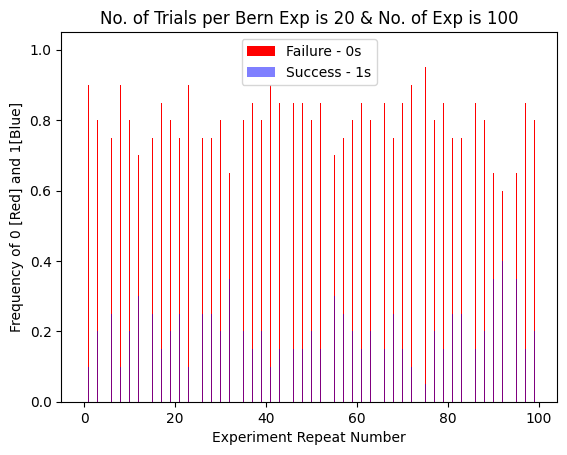

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_bar_graphs(frequencies_0, frequencies_1,numRepeatsOfExp=100,numTrialsInAnExp=20):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 0s bar graph
    ax.bar(x, frequencies_0, color='red', width = 0.1, label='Failure - 0s')

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.1, label='Success - 1s', alpha=0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of 0 [Red] and 1[Blue]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))
    ax.legend()

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_00_arr,freq_01_arr,100,20)

In [43]:

freq_arr_modf = [x for x in freq_arr if x >= 3]
num_exp = len(freq_arr_modf)
print("Number of ones >= 3 is in %s experiments:\n" %num_exp,freq_arr_modf,"\n")

freq_01_arr_modf = [x/20for x in freq_arr_modf]
print("Frequency of Success 1s per experiment with 1s >= 3 is:\n" ,freq_01_arr_modf,"\n")

print("Observed value of p = " + str(np.sum(freq_01_arr_modf)/num_exp))

Number of ones >= 3 is in 77 experiments:
 [3.0, 4.0, 4.0, 5.0, 5.0, 7.0, 3.0, 4.0, 6.0, 6.0, 6.0, 5.0, 4.0, 3.0, 4.0, 4.0, 5.0, 6.0, 4.0, 5.0, 5.0, 4.0, 4.0, 7.0, 7.0, 3.0, 4.0, 3.0, 6.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 6.0, 5.0, 5.0, 4.0, 3.0, 3.0, 5.0, 4.0, 6.0, 3.0, 5.0, 5.0, 7.0, 3.0, 3.0, 6.0, 3.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 7.0, 4.0, 8.0, 3.0, 7.0, 4.0, 3.0, 4.0] 

Frequency of Success 1s per experiment with 1s >= 3 is:
 [0.15, 0.2, 0.2, 0.25, 0.25, 0.35, 0.15, 0.2, 0.3, 0.3, 0.3, 0.25, 0.2, 0.15, 0.2, 0.2, 0.25, 0.3, 0.2, 0.25, 0.25, 0.2, 0.2, 0.35, 0.35, 0.15, 0.2, 0.15, 0.3, 0.2, 0.15, 0.2, 0.15, 0.15, 0.2, 0.15, 0.2, 0.15, 0.2, 0.2, 0.15, 0.15, 0.3, 0.25, 0.25, 0.2, 0.15, 0.15, 0.25, 0.2, 0.3, 0.15, 0.25, 0.25, 0.35, 0.15, 0.15, 0.3, 0.15, 0.2, 0.15, 0.25, 0.25, 0.15, 0.15, 0.15, 0.25, 0.2, 0.15, 0.35, 0.2, 0.4, 0.15, 0.35, 0.2, 0.15, 0.2] 

Observed value of p = 0.2175324675324675


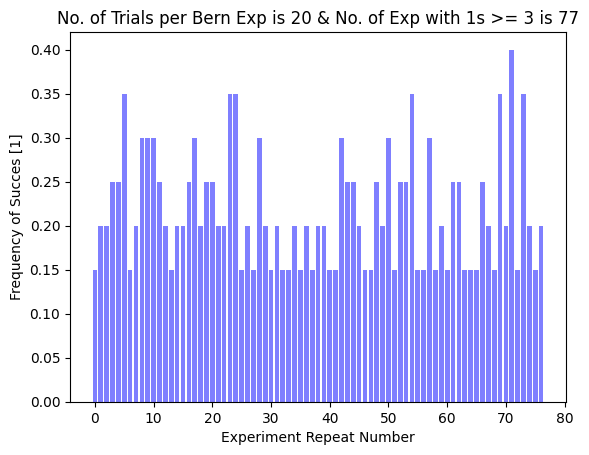

In [44]:
def plot_multiple_bar_graphs(frequencies_1,numRepeatsOfExp=1,numTrialsInAnExp=1):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.8, label='Success - 1s',alpha = 0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of Succes [1]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp with 1s >= 3 is " + str(numRepeatsOfExp))

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_01_arr_modf,num_exp,20)